In [1]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from patsy import dmatrix
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("Dataset/result_004.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df=df.drop(columns=['30','31','32','33','34','35'],axis=1)
df_mc=df[['36']]
df_mc.columns=['mc']


In [5]:
df=df.drop(columns=['36'])

In [6]:
df_1=df.copy()
df_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.63,-2.38,-1.37,-3.50,-2.25,-1.37,-3.00,-2.63,0.50,0.75,...,1.63,2.00,-0.63,0.12,-1.25,-1.50,-0.12,-0.75,-1.88,0.12
1,-3.63,-1.50,-1.50,-3.63,-2.38,-1.37,-2.88,-2.50,0.50,0.75,...,1.75,2.13,-0.63,-0.25,-1.37,-1.50,0.00,-0.88,-1.63,0.00
2,-3.63,-2.50,-1.37,-3.50,-2.25,-1.50,-3.00,-2.63,0.50,0.63,...,1.75,1.88,-0.12,-0.12,-1.75,-0.88,0.00,-0.88,-1.12,-0.25
3,-3.50,-2.63,-1.37,-3.50,-2.25,-1.37,-3.13,-2.50,0.37,0.50,...,1.75,1.75,0.00,-0.37,-1.50,-0.88,0.00,-0.88,-1.50,-0.37
4,-3.63,-2.50,-1.50,-3.38,-2.13,-1.63,-3.13,-2.50,0.37,0.63,...,1.50,2.38,-0.12,-1.00,-1.00,-0.88,-0.12,-0.25,-1.63,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,-3.25,-2.75,-1.00,-3.25,-2.50,-1.37,-2.63,-2.13,0.25,0.37,...,0.63,1.50,-0.37,-0.37,-1.00,-1.37,0.00,-1.00,-1.50,0.37
5853,-3.25,-1.88,-1.12,-3.13,-2.38,-1.25,-2.75,-2.25,0.25,0.37,...,1.25,2.13,0.12,-0.63,-1.12,-1.00,-0.37,-0.50,-1.50,-0.50
5854,-3.25,-2.00,-1.00,-3.13,-2.50,-1.37,-2.50,-2.38,0.25,0.63,...,1.75,1.00,-0.37,-0.25,-1.37,-0.63,-0.37,-1.37,-1.25,-0.12
5855,-3.13,-1.63,-1.12,-3.13,-2.50,-1.50,-2.50,-2.38,0.12,0.50,...,1.37,1.37,-0.50,0.25,-1.75,-1.00,-0.25,-1.12,-1.00,0.00


In [7]:
for i in range(30):
    df['{}'.format(i)]= df['12']-df['{}'.format(i)]

for i in range(30):
    df_1['{}'.format(i)]= df['25']-df['{}'.format(i)]


In [8]:
df=df.drop(columns=['12'])
df_1=df_1.drop(columns=['25'])

In [9]:
df.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
df

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,6.88,5.63,4.62,6.75,5.50,4.62,6.25,5.88,2.75,2.50,...,-1.63,-2.00,0.63,-0.12,1.25,1.50,0.12,0.75,1.88,-0.12
1,6.51,4.38,4.38,6.51,5.26,4.25,5.76,5.38,2.38,2.13,...,-1.75,-2.13,0.63,0.25,1.37,1.50,0.00,0.88,1.63,0.00
2,6.13,5.00,3.87,6.00,4.75,4.00,5.50,5.13,2.00,1.87,...,-1.75,-1.88,0.12,0.12,1.75,0.88,0.00,0.88,1.12,0.25
3,7.38,6.51,5.25,7.38,6.13,5.25,7.01,6.38,3.51,3.38,...,-1.75,-1.75,0.00,0.37,1.50,0.88,0.00,0.88,1.50,0.37
4,3.88,2.75,1.75,3.63,2.38,1.88,3.38,2.75,-0.12,-0.38,...,-1.50,-2.38,0.12,1.00,1.00,0.88,0.12,0.25,1.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,4.62,4.12,2.37,4.62,3.87,2.74,4.00,3.50,1.12,1.00,...,-0.63,-1.50,0.37,0.37,1.00,1.37,0.00,1.00,1.50,-0.37
5853,6.38,5.01,4.25,6.26,5.51,4.38,5.88,5.38,2.88,2.76,...,-1.25,-2.13,-0.12,0.63,1.12,1.00,0.37,0.50,1.50,0.50
5854,4.88,3.63,2.63,4.76,4.13,3.00,4.13,4.01,1.38,1.00,...,-1.75,-1.00,0.37,0.25,1.37,0.63,0.37,1.37,1.25,0.12
5855,5.76,4.26,3.75,5.76,5.13,4.13,5.13,5.01,2.51,2.13,...,-1.37,-1.37,0.50,-0.25,1.75,1.00,0.25,1.12,1.00,0.00


In [10]:
df_1.columns=['30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58']

In [11]:
df=pd.concat([df,df_1],axis=1)
df=pd.concat([df,df_mc],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,6.88,5.63,4.62,6.75,5.50,4.62,6.25,5.88,2.75,2.50,...,3.13,3.50,0.87,1.62,0.25,1.38,0.75,-0.38,1.62,1.087903
1,6.51,4.38,4.38,6.51,5.26,4.25,5.76,5.38,2.38,2.13,...,3.25,3.63,0.87,1.25,0.13,1.50,0.62,-0.13,1.50,1.064780
2,6.13,5.00,3.87,6.00,4.75,4.00,5.50,5.13,2.00,1.87,...,2.63,2.76,0.76,0.76,-0.87,0.88,0.00,-0.24,0.63,1.044257
3,7.38,6.51,5.25,7.38,6.13,5.25,7.01,6.38,3.51,3.38,...,2.63,2.63,0.88,0.51,-0.62,0.88,0.00,-0.62,0.51,1.025477
4,3.88,2.75,1.75,3.63,2.38,1.88,3.38,2.75,-0.12,-0.38,...,2.38,3.26,0.76,-0.12,-0.12,0.76,0.63,-0.75,0.25,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,4.62,4.12,2.37,4.62,3.87,2.74,4.00,3.50,1.12,1.00,...,2.00,2.87,1.00,1.00,0.37,1.37,0.37,-0.13,1.74,1.282344
5853,6.38,5.01,4.25,6.26,5.51,4.38,5.88,5.38,2.88,2.76,...,2.25,3.13,1.12,0.37,-0.12,0.63,0.50,-0.50,0.50,1.297385
5854,4.88,3.63,2.63,4.76,4.13,3.00,4.13,4.01,1.38,1.00,...,2.38,1.63,0.26,0.38,-0.74,0.26,-0.74,-0.62,0.51,1.309049
5855,5.76,4.26,3.75,5.76,5.13,4.13,5.13,5.01,2.51,2.13,...,2.37,2.37,0.50,1.25,-0.75,0.75,-0.12,0.00,1.00,1.315252


In [12]:
scaler=MinMaxScaler()
for i in range(1,59):
    scaler.fit(df[['{}'.format(i)]])
    df[['{}'.format(i)]]=scaler.transform(df[['{}'.format(i)]])

df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,0.692497,0.672346,0.70250,0.70250,0.699068,0.692903,0.713561,0.715990,0.692497,0.660645,...,0.750,0.778107,0.649306,0.715655,0.684874,0.752,0.904943,0.617424,0.809886,1.087903
1,0.646986,0.508519,0.67250,0.67250,0.667111,0.645161,0.651458,0.656325,0.646986,0.612903,...,0.810,0.816568,0.649306,0.597444,0.634454,0.800,0.855513,0.712121,0.764259,1.064780
2,0.600246,0.589777,0.60875,0.60875,0.599201,0.612903,0.618504,0.626492,0.600246,0.579355,...,0.500,0.559172,0.611111,0.440895,0.214286,0.552,0.619772,0.670455,0.433460,1.044257
3,0.753998,0.787680,0.78125,0.78125,0.782956,0.774194,0.809886,0.775656,0.785978,0.774194,...,0.500,0.520710,0.652778,0.361022,0.319328,0.552,0.619772,0.526515,0.387833,1.025477
4,0.323493,0.294889,0.34375,0.31250,0.283622,0.339355,0.349810,0.342482,0.339483,0.289032,...,0.375,0.707101,0.611111,0.159744,0.529412,0.504,0.859316,0.477273,0.288973,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,0.414514,0.474443,0.42125,0.43625,0.482024,0.450323,0.428390,0.431981,0.492005,0.467097,...,0.185,0.591716,0.694444,0.517572,0.735294,0.748,0.760456,0.712121,0.855513,1.282344
5853,0.630996,0.591088,0.65625,0.64125,0.700399,0.661935,0.666667,0.656325,0.708487,0.694194,...,0.310,0.668639,0.736111,0.316294,0.529412,0.452,0.809886,0.571970,0.384030,1.297385
5854,0.446494,0.410223,0.45375,0.45375,0.516644,0.483871,0.444867,0.492840,0.523985,0.467097,...,0.375,0.224852,0.437500,0.319489,0.268908,0.304,0.338403,0.526515,0.387833,1.309049
5855,0.554736,0.492792,0.59375,0.57875,0.649800,0.629677,0.571610,0.612172,0.662977,0.612903,...,0.370,0.443787,0.520833,0.597444,0.264706,0.500,0.574144,0.761364,0.574144,1.315252


In [13]:
scaler.fit(df_mc)
df_mc=scaler.transform(df_mc)
df_mc

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

## Dataset 12,28 to regression

In [236]:
data = df[['12','41','44']]
data

,12,41,44
0,0.517906,0.534435,0.281796
1,0.483471,0.550964,0.219451
2,0.482094,0.500000,0.124688
3,0.465565,0.516529,0.154613
4,0.206612,0.758953,0.032419
...,...,...,...
5853,0.964187,0.088154,0.812968
5854,0.534435,0.447658,0.780549
5855,0.636364,0.501377,0.905237
5856,0.757576,0.294766,0.812968


In [237]:
target=df_mc
target

,mc
0,1.087903
1,1.064780
2,1.044257
3,1.025477
4,1.009584
...,...
5853,1.297385
5854,1.309049
5855,1.315252
5856,1.312718


In [238]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=False , random_state=10)

In [239]:
x_train, X2_val, y_train, y_val = train_test_split(x_train, y_train,shuffle=False,test_size=0.3)

In [85]:
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train)

x_train_poly=poly.transform(x_train)
poly.fit(x_test)
x_test_poly=poly.transform(x_test)

In [240]:
model_poly = linear_model.Ridge(alpha=0.9,tol=1e-10,solver='auto').fit(x_train,y_train)

In [241]:
pre=model_poly.predict(x_test)
pre

array([[0.93569398],
       [0.93169714],
       [0.93667342],
       ...,
       [0.9389156 ],
       [0.93526914],
       [0.93682706]])

In [117]:
scaler.fit(pre)
pre=scaler.transform(pre)

In [242]:
model_poly.score(x_test,y_test)

-0.0004922017288349068

In [243]:
ep_12=[]
for i in range(1,1700,1):
    RMSE=mean_squared_error(y_test[:i],pre[:i])**0.5
    ep_12.append(RMSE)

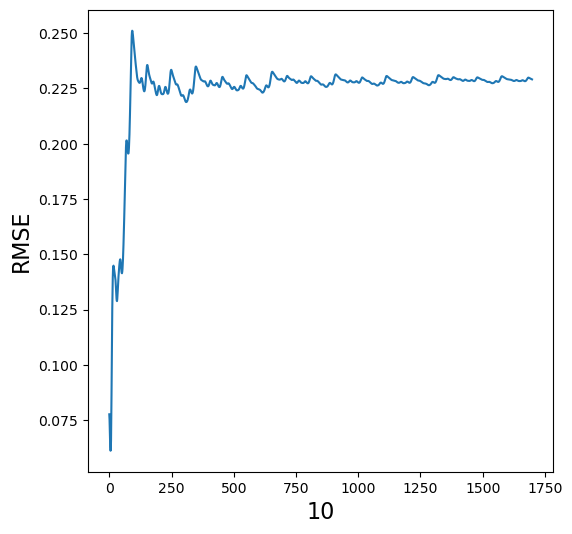

In [244]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_12)
plt.xlabel("10",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)
plt.show()

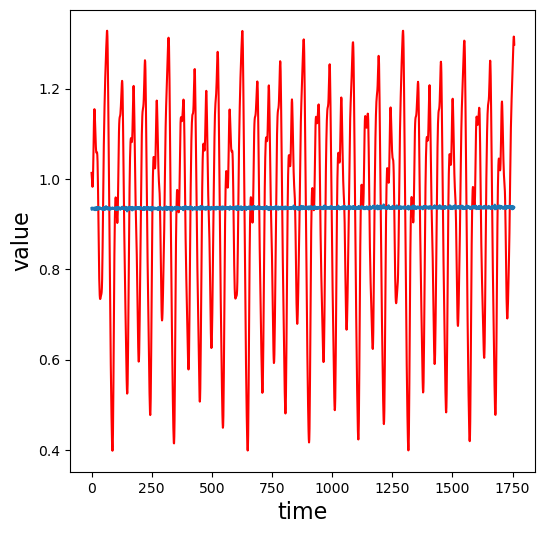

In [245]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test),c='r')
plt.plot(pre)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

## 11-13, 26-29 Dataset

In [ ]:
data_pick=df[['11','12','13','26','27','28','29']]
data_pick

In [365]:
target_pick=df_mc.values
target_pick

array([[1.08790267],
       [1.06478027],
       [1.04425704],
       ...,
       [1.31525212],
       [1.31271801],
       [1.29760772]])

In [ ]:
x_train_pick, x_test_pick, y_train_pick, y_test_pick = train_test_split(data_pick, target_pick, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train_pick)
x_train_pick_poly=poly.transform(x_train)
x_test_pick_poly = poly.transform(x_test)

In [ ]:
model_pick_poly = linear_model.Ridge(alpha=0.6,tol=1e-5,solver='svd').fit(x_train,y_train)

In [ ]:
pre_pick_poly=model_pick_poly.predict(x_test)
pre_pick_poly

In [ ]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(y_test_pick,c='r')
plt.plot(pre_pick_poly)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [ ]:
model_pick_poly.score(x_test,y_test)

In [ ]:
pre_pick_poly=pd.DataFrame(pre_pick_poly,columns=['predict'])

In [ ]:
y_test_pd=pd.DataFrame(y_test,columns=['target'])
corr_pick_poly_pd=pd.concat([pre_pick_poly,y_test_pd],axis=1)

In [ ]:
corr_pick_poly_pd.corr()

In [ ]:
RMSE = mean_squared_error(y_test, pre_pick_poly)**0.5
RMSE

# except upper 30

In [16]:
data_upper = df.drop(columns=['mc'],axis=1)
data_upper

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.692497,0.672346,0.70250,0.70250,0.699068,0.692903,0.713561,0.715990,0.692497,0.660645,...,0.471963,0.750,0.778107,0.649306,0.715655,0.684874,0.752,0.904943,0.617424,0.809886
1,0.646986,0.508519,0.67250,0.67250,0.667111,0.645161,0.651458,0.656325,0.646986,0.612903,...,0.471963,0.810,0.816568,0.649306,0.597444,0.634454,0.800,0.855513,0.712121,0.764259
2,0.600246,0.589777,0.60875,0.60875,0.599201,0.612903,0.618504,0.626492,0.600246,0.579355,...,0.471963,0.500,0.559172,0.611111,0.440895,0.214286,0.552,0.619772,0.670455,0.433460
3,0.753998,0.787680,0.78125,0.78125,0.782956,0.774194,0.809886,0.775656,0.785978,0.774194,...,0.532710,0.500,0.520710,0.652778,0.361022,0.319328,0.552,0.619772,0.526515,0.387833
4,0.323493,0.294889,0.34375,0.31250,0.283622,0.339355,0.349810,0.342482,0.339483,0.289032,...,0.588785,0.375,0.707101,0.611111,0.159744,0.529412,0.504,0.859316,0.477273,0.288973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,0.414514,0.474443,0.42125,0.43625,0.482024,0.450323,0.428390,0.431981,0.492005,0.467097,...,0.700935,0.185,0.591716,0.694444,0.517572,0.735294,0.748,0.760456,0.712121,0.855513
5853,0.630996,0.591088,0.65625,0.64125,0.700399,0.661935,0.666667,0.656325,0.708487,0.694194,...,0.588785,0.310,0.668639,0.736111,0.316294,0.529412,0.452,0.809886,0.571970,0.384030
5854,0.446494,0.410223,0.45375,0.45375,0.516644,0.483871,0.444867,0.492840,0.523985,0.467097,...,0.649533,0.375,0.224852,0.437500,0.319489,0.268908,0.304,0.338403,0.526515,0.387833
5855,0.554736,0.492792,0.59375,0.57875,0.649800,0.629677,0.571610,0.612172,0.662977,0.612903,...,0.121495,0.370,0.443787,0.520833,0.597444,0.264706,0.500,0.574144,0.761364,0.574144


In [17]:
target_upper=df_mc
target_upper

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

In [18]:
x_train_upper, x_test_upper, y_train_upper, y_test_upper = train_test_split(data_upper, target_upper, test_size=0.3, shuffle=False, random_state=None)

In [19]:
x_train_upper, X2_val, y_train_upper, y_val = train_test_split(x_train_upper, y_train_upper,shuffle=False,test_size=0.3)

In [28]:
poly=PolynomialFeatures(degree=4,include_bias=True)
poly.fit(x_train_upper)
x_train_pick_upper=poly.transform(x_train_upper)
x_test_pick_upper = poly.transform(x_test_upper)

MemoryError: Unable to allocate 7.67 GiB for an array with shape (1845, 557845) and data type float64

In [ ]:
y_train_upper=np.array(y_train_upper).ravel()

In [325]:
parameters={'alpha':[1e-4],'tol':[1e-5],'max_iter':[1000]}

In [ ]:
model_hub=HuberRegressor()
model_hub = GridSearchCV(model_hub, param_grid=parameters, cv=3, refit=True)
model_hub.fit(x_train_pick_upper,y_train_upper)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [327]:
scores_df = pd.DataFrame(model_hub.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'max_iter': 1000, 'tol': 1e-05}",-0.048819,1,-0.062732,-0.015967,-0.067757


In [280]:
parameters= {'alpha':[1e-3,1e-4,1e-5],'tol':[1e-3,1e-4,1e-5],'shuffle':[False],'epsilon':[1e-1,1e-2,1e-3]}

In [281]:
model_sgd=SGDRegressor()
model_sgd = GridSearchCV(model_sgd, param_grid=parameters, cv=3, refit=True)
model_sgd.fit(x_train_upper,y_train_upper)

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.0001, 1e-05],
                         'epsilon': [0.1, 0.01, 0.001], 'shuffle': [False],
                         'tol': [0.001, 0.0001, 1e-05]})

In [59]:
scores_df = pd.DataFrame(model_sgd.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
1,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
2,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
3,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
4,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
5,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
6,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
7,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
8,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
9,"{'alpha': 0.0001, 'epsilon': 0.1, 'shuffle': F...",-0.233147,10,-0.479853,-0.044206,-0.175383


In [22]:
parameters={'kernel':['linear','poly','rbf'],'gamma':['auto','scale'],'tol':[1e-3,1e-4,1e-10]}

In [34]:
model_svr=svm.SVR()
model_svr = GridSearchCV(model_svr, param_grid=parameters, cv=3, refit=True)
model_svr.fit(x_train_upper,y_train_upper)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.001, 0.0001, 1e-10]})

In [35]:
scores_df = pd.DataFrame(model_svr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.140205,14,-0.223105,-0.068555,-0.128955
1,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.140023,12,-0.221288,-0.068745,-0.130035
2,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 1...",-0.139991,10,-0.221029,-0.068761,-0.130182
3,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.001}",-0.021591,1,-0.025406,-0.016157,-0.023209
4,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.0...",-0.021654,2,-0.025406,-0.016531,-0.023027
5,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 1e-10}",-0.021657,3,-0.025406,-0.016540,-0.023026
6,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}",-0.037839,4,-0.064279,-0.019264,-0.029973
7,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.0001}",-0.037974,5,-0.064570,-0.019342,-0.030010
8,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 1e-10}",-0.037985,6,-0.064579,-0.019359,-0.030017
9,"{'gamma': 'scale', 'kernel': 'linear', 'tol': ...",-0.140205,14,-0.223105,-0.068555,-0.128955


In [75]:
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'tol':[1e-7,1e-8,1e-9,1e-10],'solver':['auto','svd']}

In [76]:
model_upper=linear_model.Ridge()
model_upper = GridSearchCV(model_upper, param_grid=parameters,  refit=True)
model_upper.fit(x_train_upper,y_train_upper)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'solver': ['auto', 'svd'],
                         'tol': [1e-07, 1e-08, 1e-09, 1e-10]})

In [77]:
scores_df = pd.DataFrame(model_upper.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-07}",-0.020493,65,-0.030614,-0.018414,-0.019349
1,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-08}",-0.020493,65,-0.030614,-0.018414,-0.019349
2,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-09}",-0.020493,65,-0.030614,-0.018414,-0.019349
3,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-10}",-0.020493,65,-0.030614,-0.018414,-0.019349
4,"{'alpha': 0.1, 'solver': 'svd', 'tol': 1e-07}",-0.020493,69,-0.030614,-0.018414,-0.019349
...,...,...,...,...,...,...
67,"{'alpha': 0.9, 'solver': 'auto', 'tol': 1e-10}",-0.016480,5,-0.027017,-0.014866,-0.017098
68,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-07}",-0.016480,1,-0.027017,-0.014866,-0.017098
69,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-08}",-0.016480,1,-0.027017,-0.014866,-0.017098
70,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-09}",-0.016480,1,-0.027017,-0.014866,-0.017098


In [47]:
parameters={'alpha':[1e-2,4e-3,1e-4,3e-4,1e-5]}

In [48]:
model_gpr=GaussianProcessRegressor()
model_gpr = GridSearchCV(model_gpr, param_grid=parameters,  refit=True)
model_gpr.fit(x_train_upper,y_train_upper)

GridSearchCV(estimator=GaussianProcessRegressor(),
             param_grid={'alpha': [0.01, 0.004, 0.0001, 0.0003, 1e-05]})

In [49]:
scores_df = pd.DataFrame(model_gpr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.01},-0.370740,1,-0.880353,-0.213999,-0.214962
1,{'alpha': 0.004},-0.714777,2,-2.032100,-0.325206,-0.354677
2,{'alpha': 0.0001},-4.025108,4,-12.165930,-1.263710,-1.409305
3,{'alpha': 0.0003},-2.832904,3,-8.822201,-0.908980,-1.029984
4,{'alpha': 1e-05},-5.456302,5,-15.910925,-1.740320,-1.878558


In [73]:
model_gpr=GaussianProcessRegressor(alpha=0.1).fit(x_train_upper,y_train_upper)
per_upper_gpr = model_gpr.predict(x_test_upper)
per_upper_gpr.reshape(-1,1)

array([[0.6235105 ],
       [0.63487457],
       [0.62949487],
       ...,
       [0.44563013],
       [0.66887911],
       [0.57831258]])

In [74]:
model_gpr.score(x_test_upper,y_test_upper)

-0.13593722324762725

## linear regression learning

In [185]:
model_linear=LinearRegression(fit_intercept=True).fit(x_train_upper,y_train_upper)

In [186]:
per_upper_li = model_upper.predict(x_test_upper)
per_upper_li.reshape(-1,1)

array([[0.50526724],
       [0.55659895],
       [0.57188508],
       ...,
       [0.4981177 ],
       [0.52442335],
       [0.48770268]])

In [183]:
scaler.fit(per_upper_li)
per_upper_li=scaler.transform(per_upper_li)
per_upper_li

array([[0.31559365],
       [0.76235753],
       [0.89539984],
       ...,
       [0.2533679 ],
       [0.48231824],
       [0.16272114]])

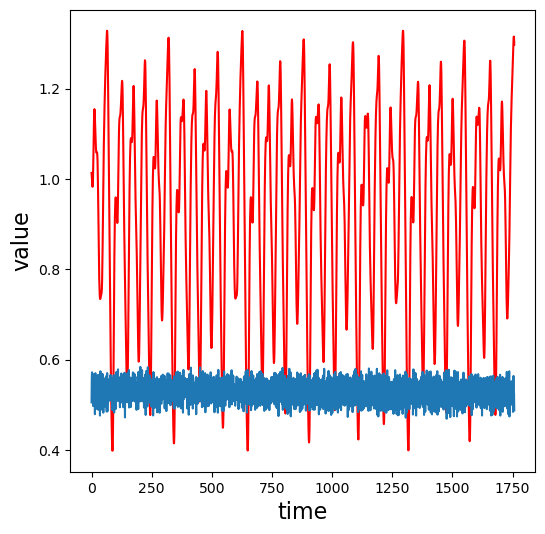

In [187]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_li)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [188]:
ep_li=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_li[:i])**0.5
    ep_li.append(RMSE)

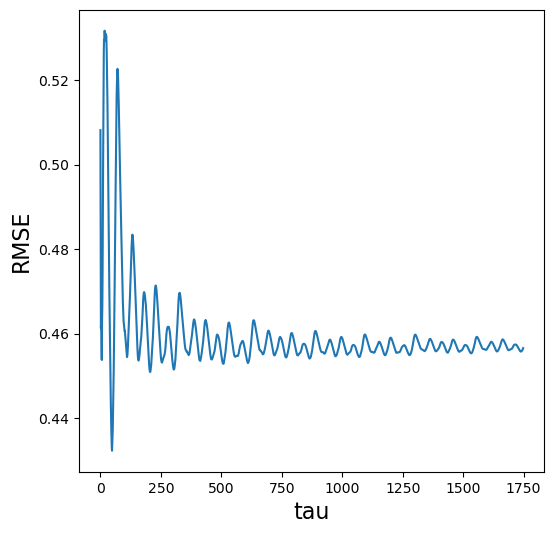

In [189]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_li)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [195]:
RMSE_li = mean_squared_error(y_test_upper, per_upper_li)**0.5
RMSE_li

0.45862332240623294

In [130]:
#!pip install eli5

In [159]:
x_train_upper

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.45250,0.441538,0.516000,0.467784,0.571429,0.573333,0.458716,0.507874,0.705234,0.676129,...,0.159664,0.071625,0.274298,0.347692,0.253333,0.688119,0.095057,0.600,0.683636,0.348
1,0.37500,0.421538,0.450667,0.403351,0.482857,0.518519,0.377457,0.426509,0.603306,0.628387,...,0.212185,0.140496,0.300216,0.424615,0.253333,0.628713,0.190114,0.652,0.774545,0.448
2,0.40625,0.421538,0.466667,0.451031,0.518571,0.518519,0.394495,0.459318,0.654270,0.645161,...,0.184874,0.311295,0.380130,0.538462,0.460000,0.871287,0.524715,0.800,0.909091,0.800
3,0.45250,0.478462,0.516000,0.515464,0.552857,0.554074,0.474443,0.539370,0.670799,0.708387,...,0.157563,0.380165,0.380130,0.498462,0.623333,0.623762,0.570342,0.800,0.865455,0.748
4,0.75000,0.789231,0.817333,0.789948,0.894286,0.888889,0.770642,0.835958,0.965565,1.000000,...,0.107143,0.311295,0.246220,0.424615,0.500000,0.376238,0.475285,0.652,0.956364,0.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0.42125,0.461538,0.417333,0.418814,0.428571,0.463704,0.410223,0.409449,0.483471,0.467097,...,0.394958,0.517906,0.596112,0.461538,0.376667,0.559406,0.711027,0.648,0.407273,0.448
2046,0.48375,0.633846,0.500000,0.498711,0.517143,0.536296,0.491481,0.490814,0.516529,0.563871,...,0.447479,0.451791,0.328294,0.424615,0.293333,0.504950,0.288973,0.448,0.410909,0.252
2047,0.50000,0.538462,0.549333,0.515464,0.535714,0.536296,0.491481,0.507874,0.603306,0.563871,...,0.447479,0.655647,0.622030,0.652308,0.790000,0.806931,0.665399,0.796,0.680000,0.700
2048,0.68750,0.826154,0.733333,0.693299,0.750000,0.758519,0.722149,0.720472,0.793388,0.774194,...,0.420168,0.413223,0.542117,0.575385,0.246667,0.435644,0.380228,0.844,0.541818,0.296


In [160]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

In [161]:
perm = PermutationImportance(model_linear).fit(x_train_upper, y_train_upper)
eli5.explain_weights_df(perm)

,feature,weight,std
0,x29,2.743397e+25,3.981446e+23
1,x0,2.575471e+25,6.567788e+23
2,x38,1.944925e+25,2.477515e+23
3,x9,1.688414e+25,3.012358e+23
4,x37,1.172099e+25,2.638328e+23
5,x8,1.065866e+25,1.031804e+23
6,x40,1.063379e+25,2.473120e+23
7,x11,9.605314e+24,1.750220e+23
8,x36,7.923932e+24,2.678088e+23
9,x7,7.383397e+24,8.757243e+22


In [80]:
sel = SelectFromModel(perm, threshold=50000000000000000000000000, prefit=True)
x_train = sel.transform(x_train_upper)
pd.DataFrame(x_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,0,1,2,3,4
0,0.452320,0.490539,0.516689,0.542117,0.500
1,0.742268,0.199418,0.249666,0.650108,0.396
2,0.757732,0.237263,0.117490,0.246220,0.448
3,0.515464,0.528384,0.502003,0.624190,0.748
4,0.306701,0.599709,0.634179,0.460043,0.300
...,...,...,...,...,...
1840,0.418814,0.473071,0.484646,0.352052,0.396
1841,0.500000,0.582242,0.534045,0.650108,0.748
1842,0.740979,0.199418,0.150868,0.272138,0.496
1843,0.435567,0.435226,0.467290,0.326134,0.396


In [75]:
x_train_upper

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
1592,0.45375,0.500000,0.468000,0.452320,0.465714,0.520000,0.442988,0.475066,0.535813,0.516129,...,0.367647,0.622590,0.542117,0.384615,0.460000,0.559406,0.760456,0.748,0.363636,0.500
3372,0.71875,0.846154,0.717333,0.742268,0.715714,0.740741,0.722149,0.737533,0.741047,0.709677,...,0.577731,0.622590,0.650108,0.692308,0.416667,0.500000,0.524715,0.848,0.498182,0.396
127,0.70375,0.672308,0.784000,0.757732,0.858571,0.871111,0.722149,0.787402,0.931129,0.935484,...,0.081933,0.242424,0.246220,0.424615,0.376667,0.128713,0.380228,0.600,0.909091,0.448
1740,0.48375,0.518462,0.549333,0.515464,0.554286,0.536296,0.491481,0.523622,0.621212,0.597419,...,0.447479,0.517906,0.624190,0.615385,0.710000,0.811881,0.669202,0.800,0.683636,0.748
2124,0.31250,0.346154,0.301333,0.306701,0.304286,0.334815,0.296199,0.295276,0.327824,0.388387,...,0.472689,0.344353,0.460043,0.538462,0.293333,0.623762,0.235741,0.548,0.363636,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.39000,0.441538,0.433333,0.418814,0.500000,0.481481,0.393185,0.442257,0.568871,0.580645,...,0.184874,0.415978,0.352052,0.230769,0.333333,0.440594,0.665399,0.648,0.498182,0.396
3014,0.50000,0.480000,0.500000,0.500000,0.500000,0.481481,0.475754,0.507874,0.568871,0.499355,...,0.527311,0.691460,0.650108,0.615385,0.706667,0.500000,0.665399,0.696,0.818182,0.748
269,0.68750,0.730769,0.766667,0.740979,0.821429,0.832593,0.720839,0.786089,0.913223,0.918710,...,0.107143,0.275482,0.272138,0.384615,0.456667,0.311881,0.425856,0.600,0.909091,0.496
647,0.40625,0.481538,0.450667,0.435567,0.482857,0.520000,0.410223,0.459318,0.586777,0.597419,...,0.159664,0.380165,0.326134,0.230769,0.293333,0.376238,0.570342,0.448,0.545455,0.396


In [71]:
y_train_upper.shape

(1845, 1)

## ridge model learning

In [20]:
model_upper=linear_model.Ridge(alpha=0.9, tol=1e-12,solver='auto').fit(x_train_upper,y_train_upper)
per_upper_rid = model_upper.predict(x_test_upper)
per_upper_rid.reshape(-1,1)

array([[0.60112396],
       [0.60330366],
       [0.57999378],
       ...,
       [0.61111099],
       [0.58447358],
       [0.58063504]])

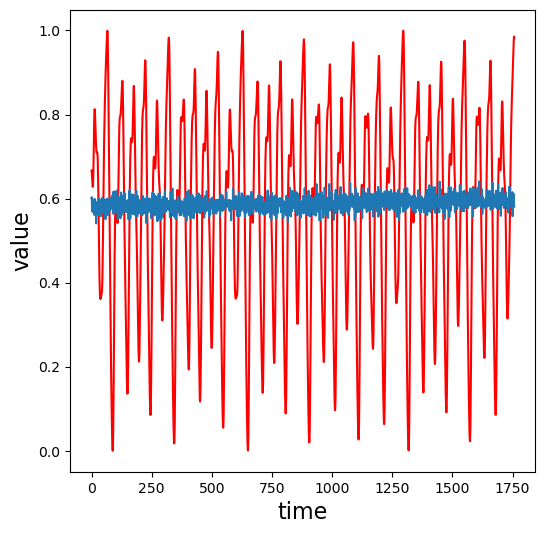

In [21]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [22]:
per_upper_rid

array([[0.60112396],
       [0.60330366],
       [0.57999378],
       ...,
       [0.61111099],
       [0.58447358],
       [0.58063504]])

In [23]:
scaler.fit(per_upper_rid)
per_upper_rid=scaler.transform(per_upper_rid)
per_upper_rid

array([[0.60265541],
       [0.6244795 ],
       [0.39109086],
       ...,
       [0.70264992],
       [0.43594459],
       [0.3975115 ]])

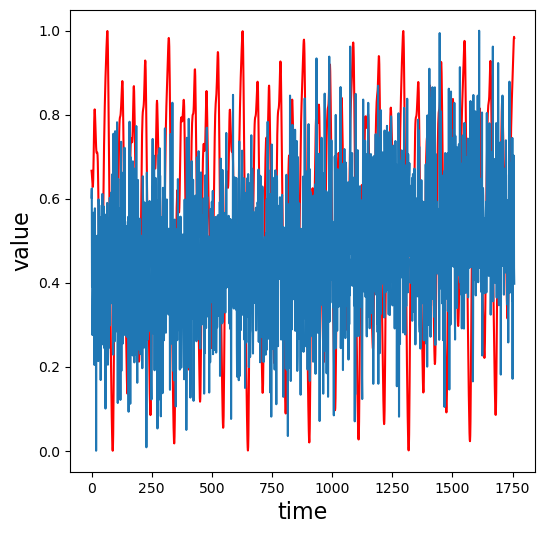

In [24]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [25]:
model_upper.score(x_test_upper,y_test_upper)

-0.0035084429430236597

In [26]:
y_test_upper

array([[0.66658223],
       [0.66108617],
       [0.65188594],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

In [27]:
ep=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_rid[:i])**0.5
    ep.append(RMSE)

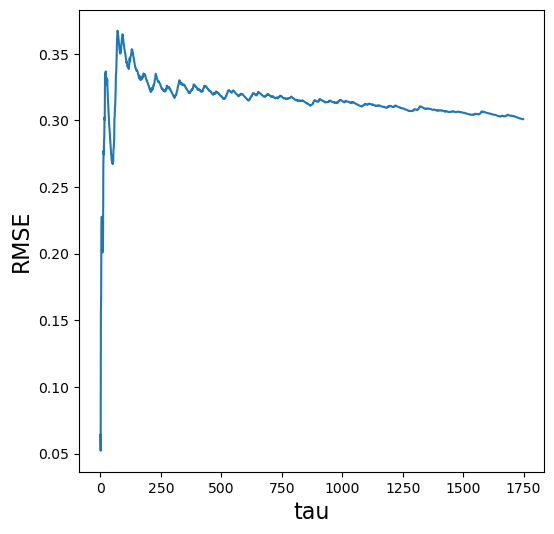

In [28]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [29]:
per_upper_pd=pd.DataFrame(per_upper_rid,columns=['predict'])
per_upper_pd

,predict
0,0.602655
1,0.624480
2,0.391091
3,0.445430
4,0.275360
...,...
1753,0.479234
1754,0.680038
1755,0.702650
1756,0.435945


In [30]:
y_test_upper=y_test_upper
y_test_upper_pd=pd.DataFrame(y_test_upper,columns=['target'])
corr_pick_upper_pd=pd.concat([per_upper_pd,y_test_upper_pd],axis=1)
corr_pick_upper_pd

,predict,target
0,0.602655,0.666582
1,0.624480,0.661086
2,0.391091,0.651886
3,0.445430,0.641309
4,0.275360,0.632215
...,...,...
1753,0.479234,0.950061
1754,0.680038,0.966224
1755,0.702650,0.978759
1756,0.435945,0.985425


In [31]:
corr_pick_upper_pd.corr()

,predict,target
predict,1.000000,0.034198
target,0.034198,1.000000


In [32]:
RMSE = mean_squared_error(y_test_upper, per_upper_rid)**0.5
RMSE

0.30198552909134757

In [33]:
perm = PermutationImportance(model_upper).fit(x_train_upper, y_train_upper)
eli5.explain_weights_df(perm)

NameError: name 'PermutationImportance' is not defined